<a href="https://colab.research.google.com/github/rafachoks/data-study/blob/master/Deep_Learning_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Construção do primeiro perceptron

##Definição do problema

Realizar a tranformação de Cº para Fº
Equação de conversão: T(Fº) = t(Cº) * 9/5 + 32

##Importação das bibliotecas

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.8.2'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Importação da base de dados

In [3]:
temperatura_df = pd.read_csv('/content/Celsius-to-Fahrenheit.csv')
temperatura_df.reset_index(drop = True, inplace=True)

##Visualização da base de dados

In [4]:
temperatura_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [5]:
temperatura_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


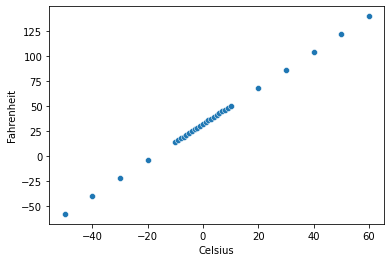

In [6]:
sns.scatterplot(x=temperatura_df['Celsius'], y=temperatura_df['Fahrenheit']);

##Configuração da base de dados de treinamento

In [7]:
X_train = temperatura_df['Celsius']
y_train = temperatura_df['Fahrenheit']

In [8]:
X_train.shape, y_train.shape

((30,), (30,))

##Construção e treinamento do modelo

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape = [1]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss = 'mean_squared_error')

In [11]:
epochs_hist = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 783ms/step - loss: 2804.7610
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 1945.8317
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 1351.0150
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 1010.9642
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 893.2972
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 933.8547
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 1043.5059
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 1138.0515
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 1168.8380
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 1127.8147
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 1033.0320
Epoch 12/100
1/1 [==============================] - 0s 17ms/step - loss: 912.5116
Epoch 13/100
1/1 [=

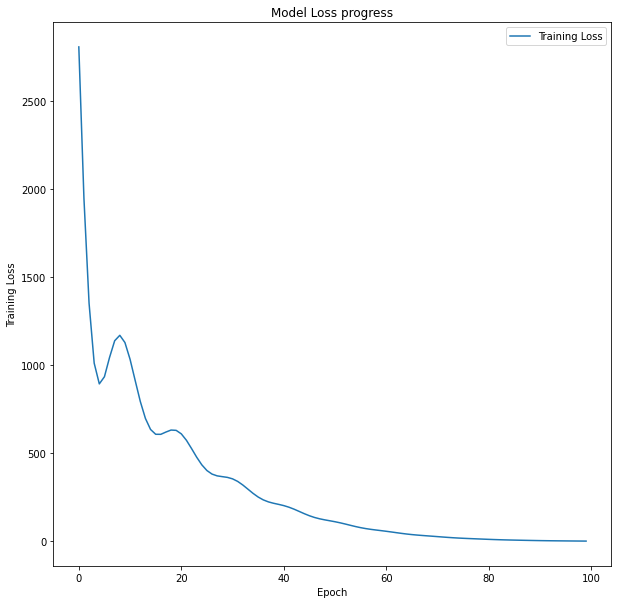

In [12]:
plt.figure(figsize=(10,10))
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss progress')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

In [13]:
model.get_weights()

[array([[1.8079983]], dtype=float32), array([30.805235], dtype=float32)]

##Avaliação do Modelo

In [14]:
temp_c = 10
temp_f = model.predict([temp_c])
temp_f

array([[48.885216]], dtype=float32)

#Segundo Perceptron

In [15]:
%tensorflow_version 2.x
import tensorflow as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.8.2'

##Importação das bases de vendas

In [16]:
vendas_df = pd.read_csv('/content/SalesData.csv')
vendas_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [17]:
vendas_df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [18]:
vendas_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [19]:
vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [20]:
vendas_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


##Visualização da base de dados

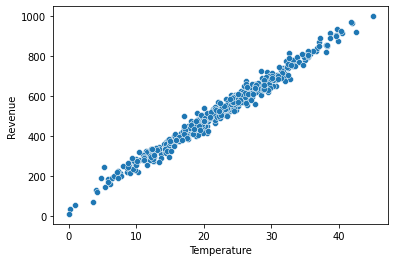

In [21]:
sns.scatterplot(x = vendas_df['Temperature'], y = vendas_df['Revenue'], );

In [22]:
X_train = vendas_df['Temperature']
y_train = vendas_df['Revenue']

In [23]:
X_train.shape

(500,)

In [24]:
y_train.shape

(500,)

##Construção do modelo

In [25]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=5, input_shape=[1]))
model.add(tf.keras.layers.Dense(units= 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 5)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 1000)

##Avaliação do modelo

In [28]:
epochs_hist.history.keys()

dict_keys(['loss'])

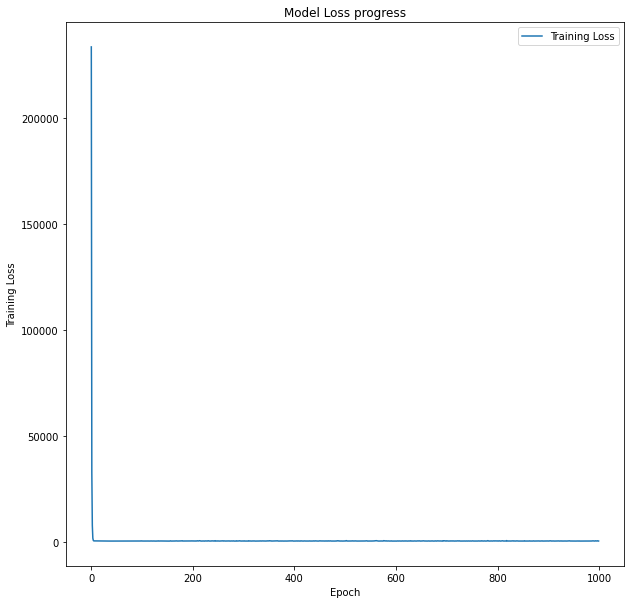

In [29]:
plt.figure(figsize=(10,10))
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss progress')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

In [30]:
model.get_weights()

[array([[-3.9334123 ,  0.06363881, -0.00824566,  2.4187174 ,  0.0077789 ]],
       dtype=float32),
 array([-6.0575404 ,  0.06212264, -0.07748474,  4.9166    , -0.23358311],
       dtype=float32),
 array([[-3.8479152e+00],
        [ 6.5381564e-02],
        [-9.4399201e-03],
        [ 2.4332840e+00],
        [ 3.2056950e-03]], dtype=float32),
 array([9.87832], dtype=float32)]

In [31]:
temp = 10
revenue = model.predict([temp])
print('Revenue predicitions using trained ANN = ', revenue)

Revenue predicitions using trained ANN =  [[255.40602]]


Text(0.5, 0, 'temperature')

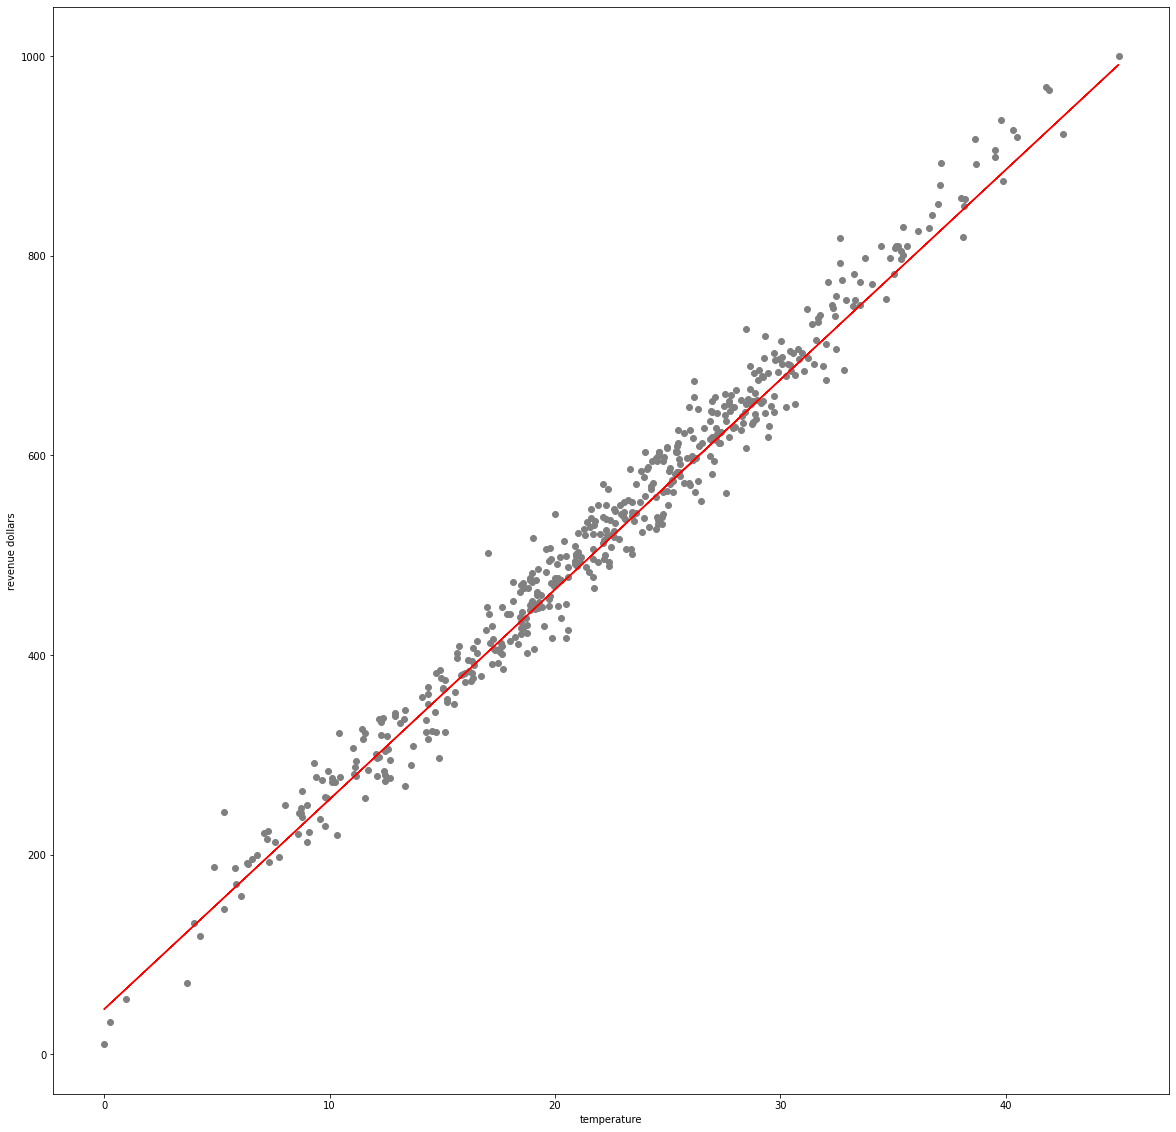

In [32]:
plt.figure(figsize=(20,20))
plt.scatter(X_train, y_train, color='gray');
plt.plot(X_train, model.predict(X_train), color='red')
plt.ylabel('revenue dollars')
plt.xlabel('temperature')

##Confirmando com SKLEARN

In [33]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
regressor.coef_

array([[21.44362551]])

In [36]:
regressor.intercept_

array([44.83126709])

In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(X_train, y_train, color='gray');
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.ylabel('revenue dollars')
plt.xlabel('temperature')

In [38]:
temp = 10
revenue = regressor.predict([[temp]])
print('Revenue predicitions using trained ANN = ', revenue)

Revenue predicitions using trained ANN =  [[259.2675222]]


# Redes neurais para regressão

##Previsão de uso de biciletas alugadas

###Importação das Bibliotecas

In [39]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

tf.__version__

'2.8.2'

### Importação da base

In [40]:
bike = pd.read_csv('/content/bike-sharing-daily.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [41]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


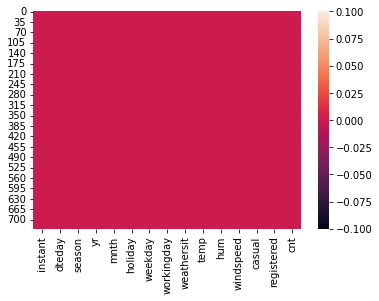

In [63]:
sns.heatmap(bike.isnull());

In [42]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


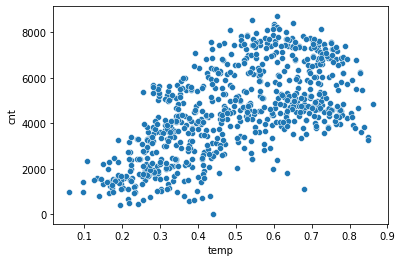

In [45]:
sns.scatterplot(x = bike['temp'], y= bike['cnt']);

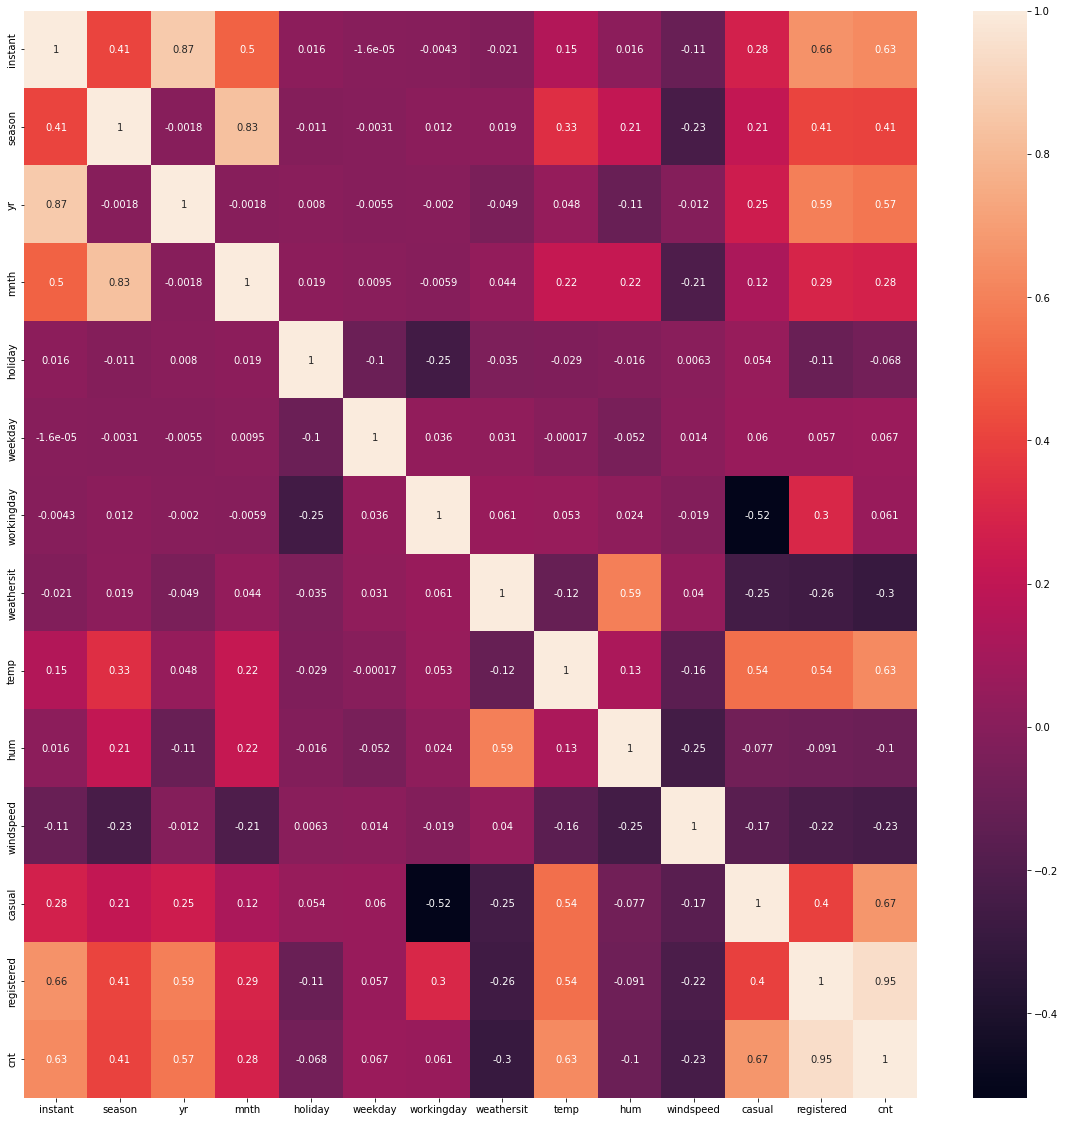

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(bike.corr(), annot=True)
plt.show()

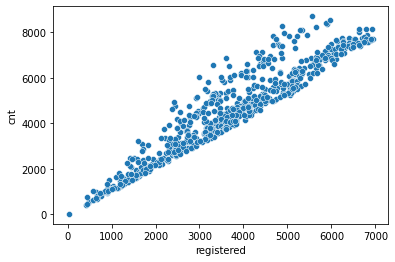

In [56]:
sns.scatterplot(x = bike['registered'], y= bike['cnt']);

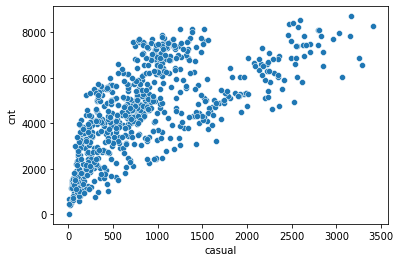

In [57]:
sns.scatterplot(x = bike['casual'], y= bike['cnt']);

In [66]:
bike = bike.drop(labels=['casual', 'registered', 'instant'], axis = 1)

In [67]:
bike.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [71]:
bike.dteday = pd.to_datetime(bike.dteday, format="m/d/y")

In [72]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [73]:
bike.index = pd.DatetimeIndex(bike.dteday)

In [74]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [75]:
bike = bike.drop(labels=['dteday'], axis = 1)

In [76]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


### Visualizar dados

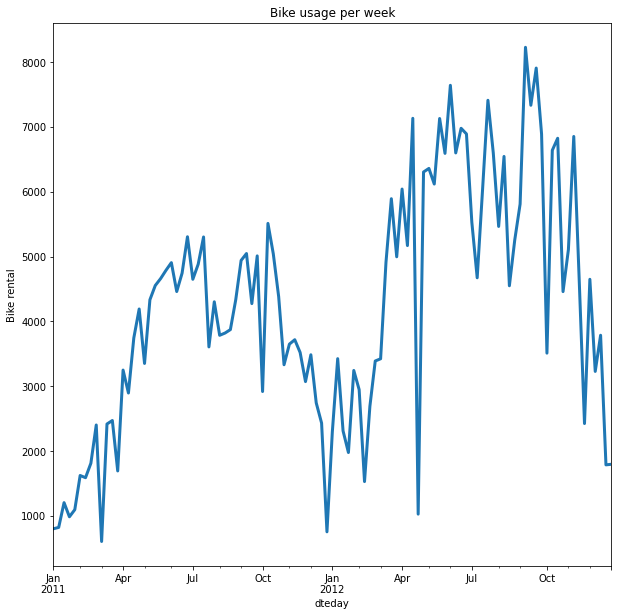

In [80]:
plt.figure(figsize=(10,10))
plt.title("Bike usage per week")
plt.ylabel('Bike rental')
plt.xlabel('Week')
bike['cnt'].asfreq('W').plot(linewidth = 3);

Text(0.5, 0, 'Month')

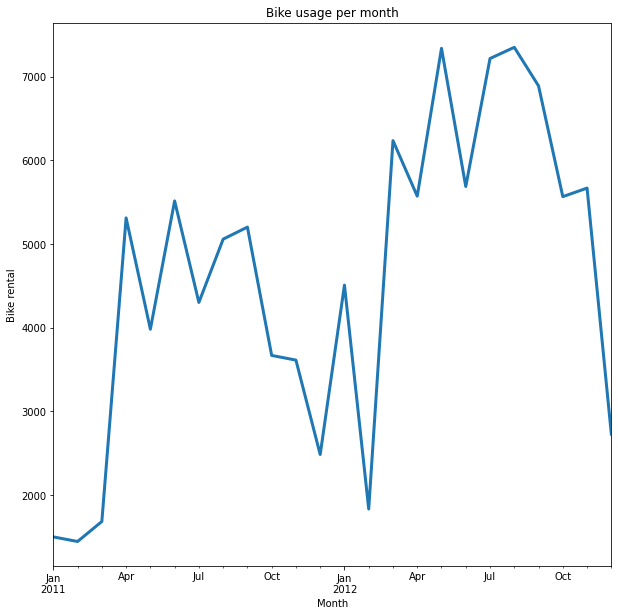

In [85]:
plt.figure(figsize=(10,10))
bike['cnt'].asfreq('M').plot(linewidth = 3);
plt.title("Bike usage per month")
plt.ylabel('Bike rental')
plt.xlabel('Month')

<Figure size 720x720 with 0 Axes>

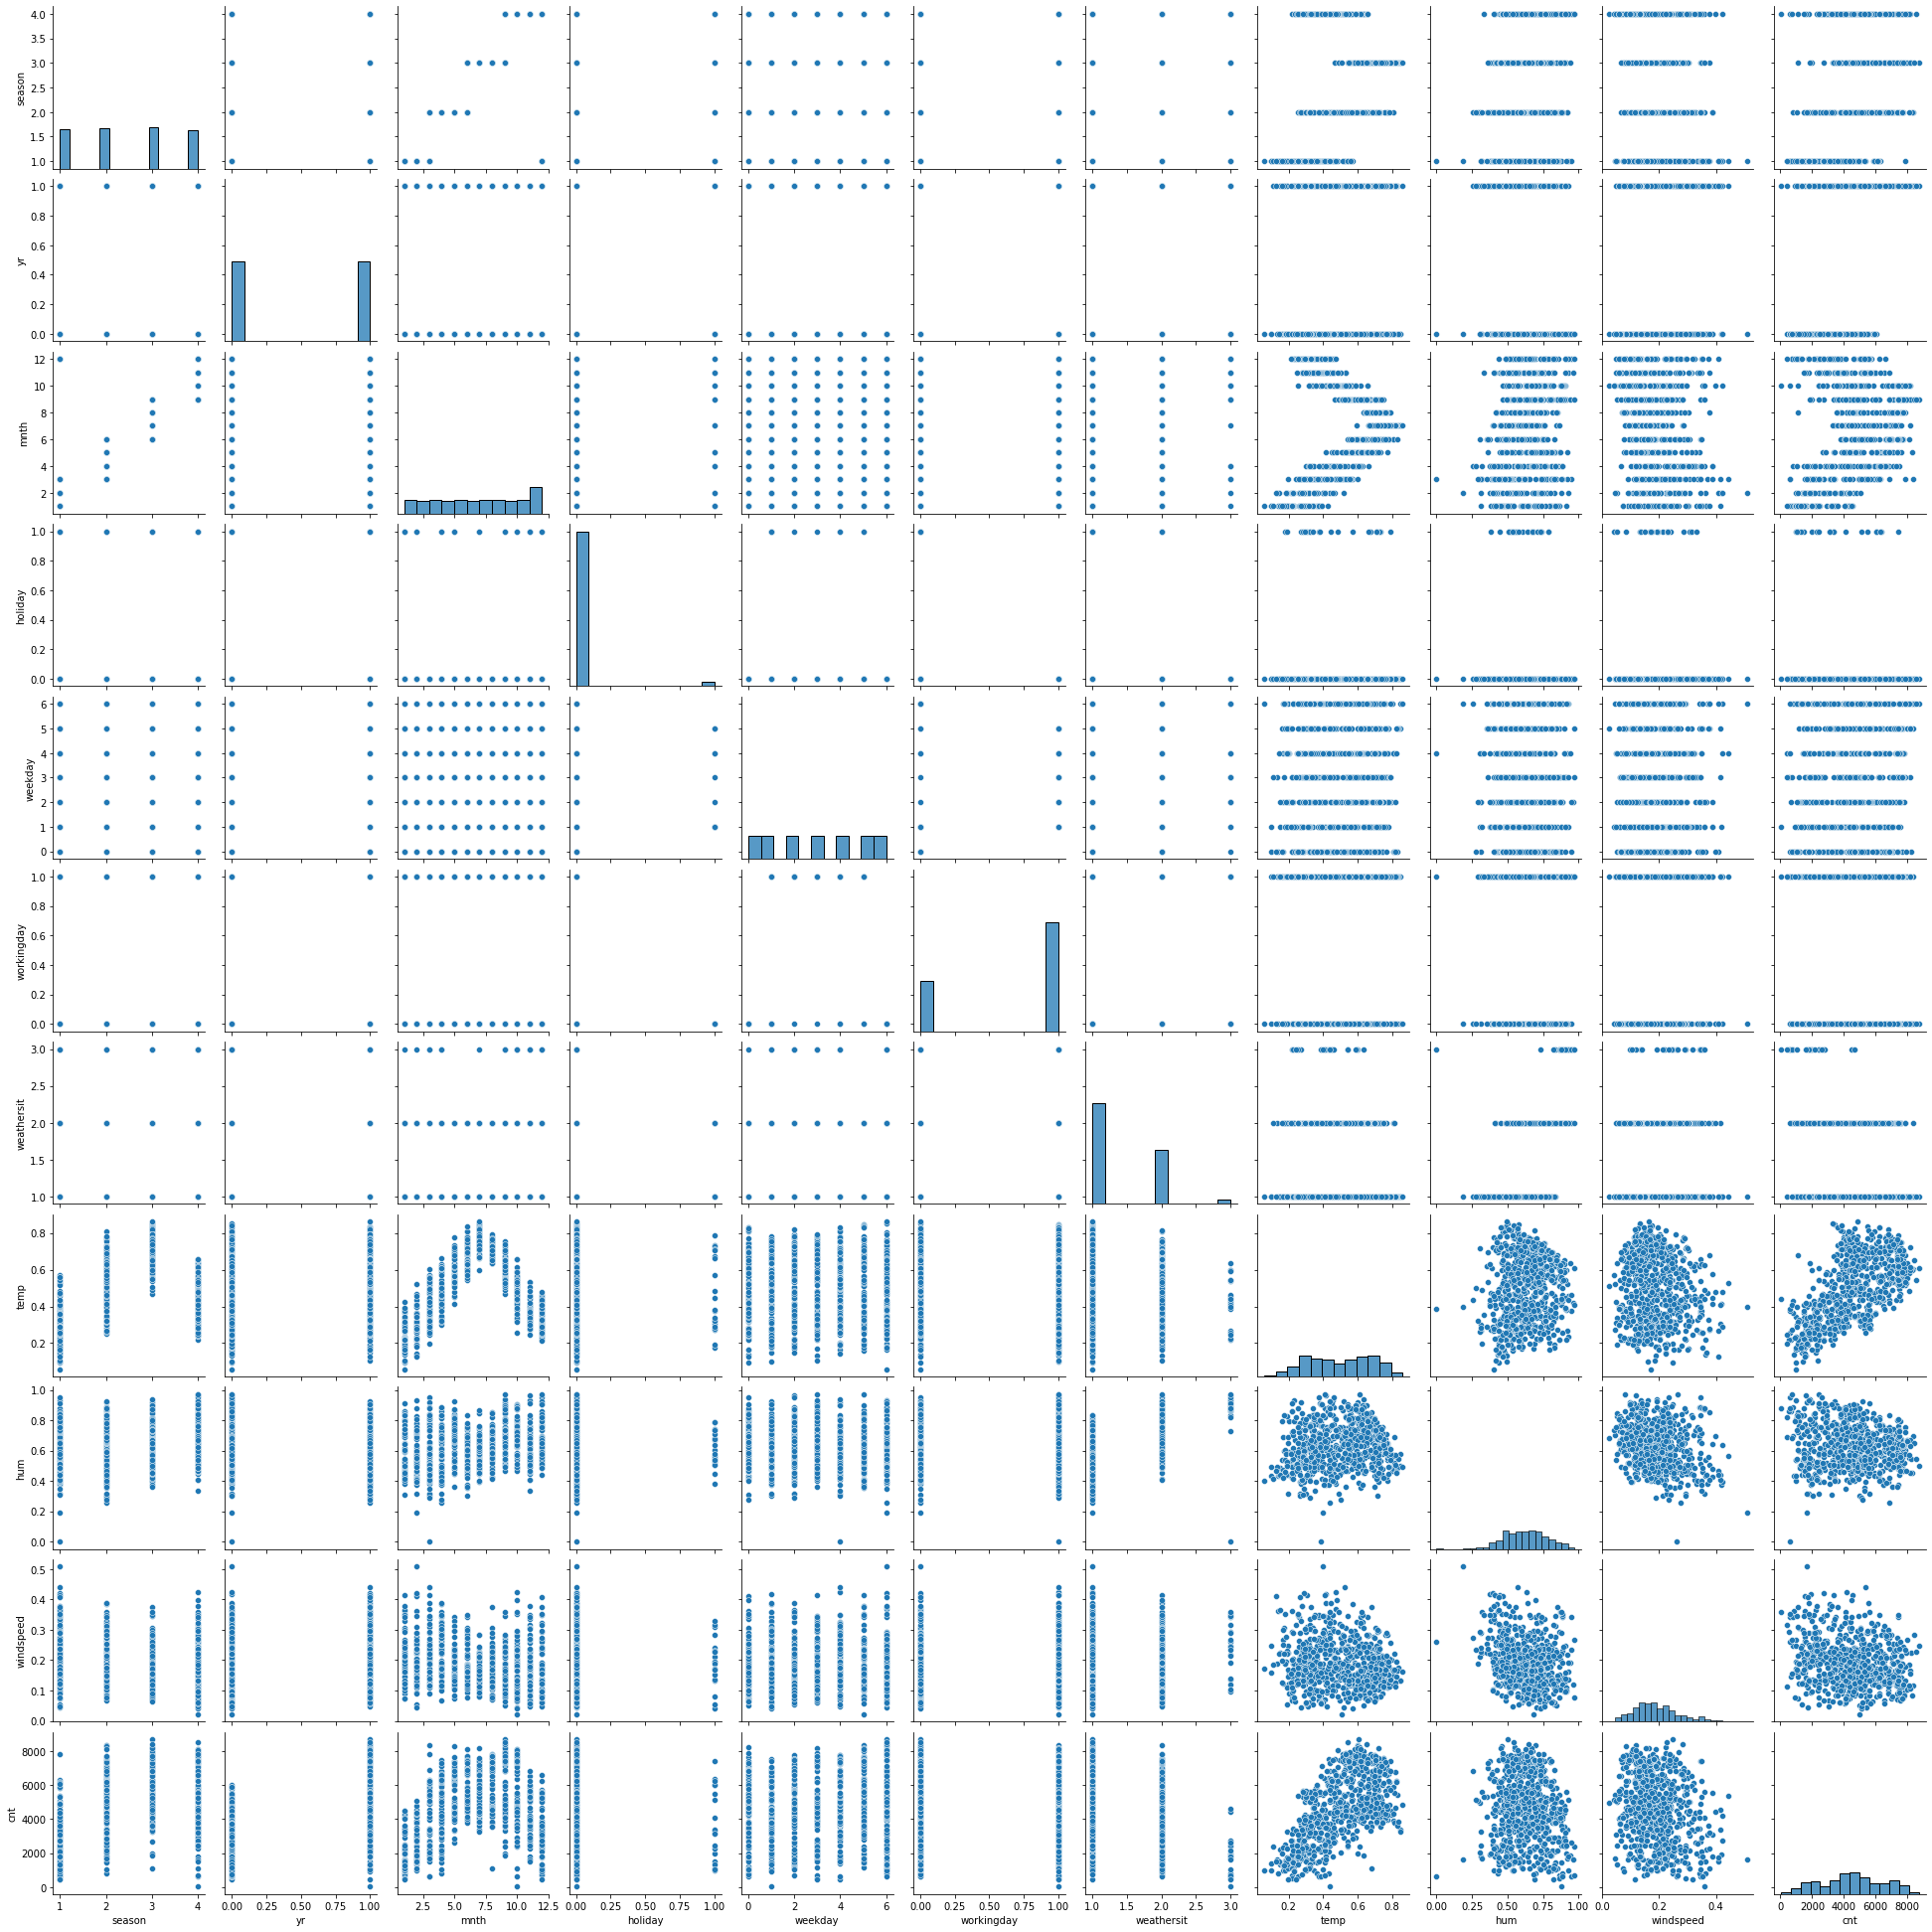

In [87]:
plt.figure(figsize=(10,10))
sns.pairplot(bike);

In [88]:
X_numerical  = bike[['temp', 'hum', 'windspeed', 'cnt']]

In [89]:
X_numerical

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


<Figure size 720x720 with 0 Axes>

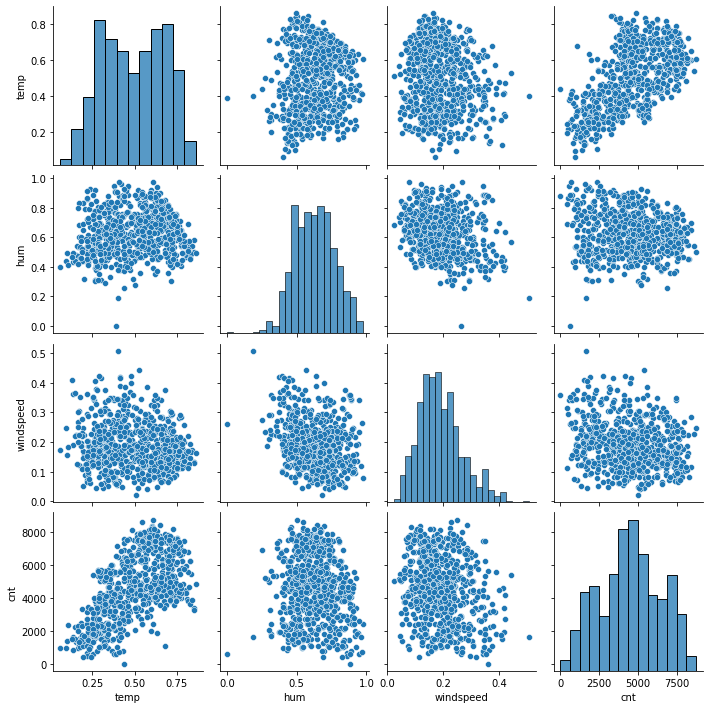

In [91]:
plt.figure(figsize=(10,10))
sns.pairplot(X_numerical);

In [59]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=3, input_shape=[3]))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

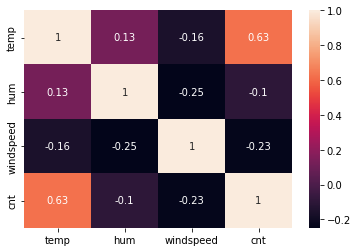

In [94]:
sns.heatmap(X_numerical.corr(), annot=True);

###Tratamento de bases

In [96]:
X_cat = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

In [97]:
X_cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1


In [98]:
from sklearn.preprocessing import OneHotEncoder
onehotenconder = OneHotEncoder()
X_cat = onehotenconder.fit_transform(X_cat).toarray()


In [100]:
X_cat

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [101]:
X_cat.shape

(731, 32)

In [104]:
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [105]:
X_numerical.head()

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600


In [106]:
X_numerical = X_numerical.reset_index()
X_numerical

,dteday,temp,hum,windspeed,cnt
0,2011-01-01,0.344167,0.805833,0.160446,985
1,2011-01-02,0.363478,0.696087,0.248539,801
2,2011-01-03,0.196364,0.437273,0.248309,1349
3,2011-01-04,0.200000,0.590435,0.160296,1562
4,2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...
726,2012-12-27,0.254167,0.652917,0.350133,2114
727,2012-12-28,0.253333,0.590000,0.155471,3095
728,2012-12-29,0.253333,0.752917,0.124383,1341
729,2012-12-30,0.255833,0.483333,0.350754,1796


In [108]:
X_all = pd.concat([X_cat, X_numerical], axis= 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,dteday,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-01,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-02,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-03,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-04,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,2012-12-27,0.254167,0.652917,0.350133,2114
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,2012-12-28,0.253333,0.590000,0.155471,3095
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2012-12-29,0.253333,0.752917,0.124383,1341
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2012-12-30,0.255833,0.483333,0.350754,1796


In [ ]:
X_all = X_all.drop(labels=['dteday'], axis = 1)


In [111]:
X_all

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.254167,0.652917,0.350133,2114
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.253333,0.590000,0.155471,3095
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.253333,0.752917,0.124383,1341
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.255833,0.483333,0.350754,1796


In [112]:
X = X_all.iloc[:, :-1].values

In [113]:
y = X_all.iloc[:, -1:].values

In [114]:
X.shape, y.shape

((731, 35), (731, 1))

###Construção de modelo

In [119]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [122]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((584, 35), (147, 35), (584, 1), (147, 1))

In [123]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units= 100, activation='relu', input_shape=[35]))
model.add(tf.keras.layers.Dense(units= 100, activation='relu'))
model.add(tf.keras.layers.Dense(units= 100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [124]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               3600      
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 23,901
Trainable params: 23,901
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [126]:
epochs_hist = model.fit(X_train, y_train, epochs = 25, batch_size = 50, validation_split=0.2)

Epoch 1/25
10/10 [==============================] - 1s 20ms/step - loss: 0.1263 - val_loss: 0.0508
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0307 - val_loss: 0.0218
Epoch 3/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0156 - val_loss: 0.0202
Epoch 4/25
10/10 [==============================] - 0s 8ms/step - loss: 0.0123 - val_loss: 0.0177
Epoch 5/25
10/10 [==============================] - 0s 8ms/step - loss: 0.0093 - val_loss: 0.0167
Epoch 6/25
10/10 [==============================] - 0s 7ms/step - loss: 0.0081 - val_loss: 0.0170
Epoch 7/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0070 - val_loss: 0.0159
Epoch 8/25
10/10 [==============================] - 0s 8ms/step - loss: 0.0064 - val_loss: 0.0150
Epoch 9/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0060 - val_loss: 0.0147
Epoch 10/25
10/10 [==============================] - 0s 8ms/step - loss: 0.0054 - val_loss: 0.0152
Epoch 11/25
10/10 

### Validação do Modelo

In [127]:
epochs_hist.history.keys

<function dict.keys>

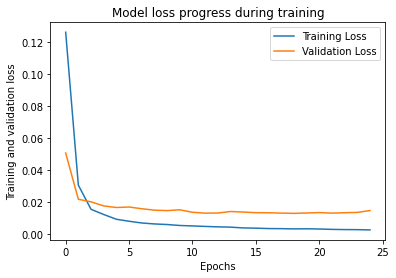

In [132]:
plt.plot(epochs_hist.history['loss']);
plt.plot(epochs_hist.history['val_loss']);
plt.title("Model loss progress during training")
plt.xlabel('Epochs')
plt.ylabel('Training and validation loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [133]:
y_predict = model.predict(X_test)

In [ ]:
y_predict

Text(0, 0.5, 'True values')

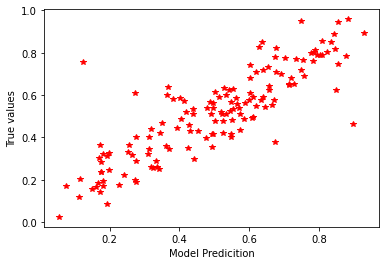

In [141]:
plt.plot(y_test, y_predict, "*", color='r');
plt.xlabel("Model Predicition")
plt.ylabel("True values")

In [142]:
y_predict_origin = scaler.inverse_transform(y_predict)
y_test_origin = scaler.inverse_transform(y_test)

Text(0, 0.5, 'True values')

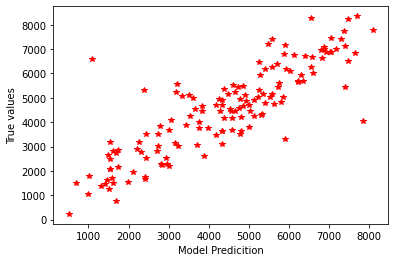

In [143]:
plt.plot(y_test_origin, y_predict_origin, "*", color='r');
plt.xlabel("Model Predicition")
plt.ylabel("True values")

In [145]:
k = X_test.shape[1]
k

35

In [147]:
n = len(X_test)
n

147

In [150]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [151]:
mae = mean_absolute_error(y_test_origin, y_predict_origin)
mse = mean_squared_error(y_test_origin, y_predict_origin)
rmse = sqrt(mse)
r2 = r2_score(y_test_origin, y_predict_origin)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [162]:
print("MAE: ", mae, "\nMSE: ", mse, "\nRMSE: ", rmse , "\nR2: ", r2 , "\nADJ_R2: ", adj_r2)

MAE:  708.0218390639948 
MSE:  1003518.9900261693 
RMSE:  1001.7579498193011 
R2:  0.7135839574849694 
ADJ_R2:  0.6232725927279779
